# Ejercicio 1

Escriba un programa en Python que calcule la forma expandida
$$
p(x) = x^5 - 5x^4 + 10x^3 - 10x^2 + 5x - 1, \text{ del polinomio } (x - 1)^5  
$$

In [ ]:
#1.1
import math

def expanded_form(pol, grade):
    output = []
    for k in range(grade+1):
        output.append(math.comb(grade, k) * pol[0]**(grade-k) * pol[1]**k)
    return output

pol = expanded_form([1, -1], 5)

print(pol)

Para 200 valores de \( x \) en una vecindad pequeña de \( x = 1 \), dígase \((0.9986 \leq x \leq 1.0014)\) y con \( prec = Eps_M \) (precisión de la máquina), ejecute el programa para obtener \( \frac{p(x)}{prec} \).

In [ ]:
#1.2
import numpy as np

def evaluar_pol(lista_de_coeficientes: list, x: int):
    pol = np.array(lista_de_coeficientes, dtype = np.float64)
    temp = 0
    for j in range(len(pol)):
        temp += x**(len(pol)-j-1) * pol[j]
    return temp

numeros = list(np.linspace(0.9986, 1.0014, 200))
x = numeros.copy()
prec = np.finfo(float).eps

for k in range(len(numeros)):
    numeros[k] = evaluar_pol(pol, numeros[k]) / prec

Muestre los resultados en un gráfico lineal por tramos. ¿Qué observa?

In [ ]:
#1.3
import matplotlib.pyplot as plt

plt.plot(x, numeros)
plt.xlabel("Valores de x")
plt.ylabel("p(x)/prec")
#plt.xlim(0.9985, 1.0015)
plt.grid()

¿Cuál es el intervalo de incertidumbre para la raíz numérica correspondiente a la raíz exacta \( x = 1 \)?

In [1]:
import numpy as np
# Precisión de la máquina (epsilon) para float64 (doble precisión)
eps_m = np.finfo(float).eps
# Cálculo del intervalo de incertidumbre
delta = eps_m ** (1/5)  # |x - 1| ≤ eps_m^(1/5)
x_min = 1 - delta
x_max = 1 + delta
print(f"Intervalo de incertidumbre para la raíz x=1: [{x_min:.5f}, {x_max:.5f}]")

Intervalo de incertidumbre para la raíz x=1: [0.99926, 1.00074]


# Ejercicio 2

In [ ]:
#2.1
pol = [3,0,1,-1]
intervalo = [0,1]

def derivada(pol):
    output = []
    for k in range(0,len(pol)-1):
        output.append(pol[k]*(len(pol)-1))
    return output
        
print(f"Limite superior : {evaluar_pol(pol,intervalo[1])}")
print(f"Limite inferior: {evaluar_pol(pol,intervalo[0])}")
print(f"La funcion:{derivada(pol)} es una parabola con vertice en (0,3) y abre hacia arriba por lo que no tiene ceros")
print(f"Por lo q si la evaluamos en 0, nos da 3, un termino positivo, lo que nos indica que f(x) es creciente en todo su dominio")
print(f"Como la funcion es monotona creciente, y pasa de un valor negativo a uno positivo, por el teorema de un colega ahi se puede decir q hay un cero de la funcion")


In [ ]:
#2.2
def n_Bisecciones(n, pol, intervalo):
    fa = evaluar_pol(pol, intervalo[0])
    fb = evaluar_pol(pol, intervalo[1])
    middle = (intervalo[0] + intervalo[1])/2
    tol = 1e-6
    fc = evaluar_pol(pol, middle)
    
    if n == 0:
        return middle
    if abs(fc) < tol:
        return print(f"Se llego a {middle} en {n} iteraciones")
    
    if fa * fc < 0:
        return n_Bisecciones(n-1, pol,[intervalo[0], middle])
    
    if fb * fc < 0:
        return n_Bisecciones(n-1, pol, [middle, intervalo[1]])
    
print(n_Bisecciones(3, pol, intervalo))

In [ ]:
#2.3
k = 0
while True:
    error_Biseccion = (intervalo[1] - intervalo[0])/2**k
    if error_Biseccion <= 1e-6:
        print(k)
        break
    k+=1

In [3]:
#2.4
def Newton_Raphson(fx, df, ini, tol = 1e-6, max_it = 100):
    """
    Adivina
    Args:
        fx: Funcion lambda
        df: Funcion lambda
    """
    while max_it >= 0:
        xn = ini - (fx(ini)/df(ini))
        if abs(xn -ini) < tol or abs(fx(ini) - df(ini)) < tol:
            return xn
        ini = xn
            
print(Newton_Raphson(lambda x: x**3 + x -1, lambda x: 3*x**2 + 1, 0.5))

0.6823278038283471


In [8]:
#2.6
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 + x - 1

def df(x):
    return 3*x**2 + 1

x0 = 1
x_star, iterations = Newton_Raphson(f, df, x0)
print(f"Solución aproximada x*: {x_star:.6f}")

if len(iterations) >= 3:
    x_k = iterations[-2]
    x_k1 = iterations[-1]
    limite = (x_k1 - x_star) / (x_k - x_star)**2
    theoretical_limit = (3 * x_star) / (3 * x_star**2 + 1)
    print(f"Límite calculado: {limite:.6f}")
    print(f"Límite teórico: {theoretical_limit:.6f}")

TypeError: cannot unpack non-iterable float object

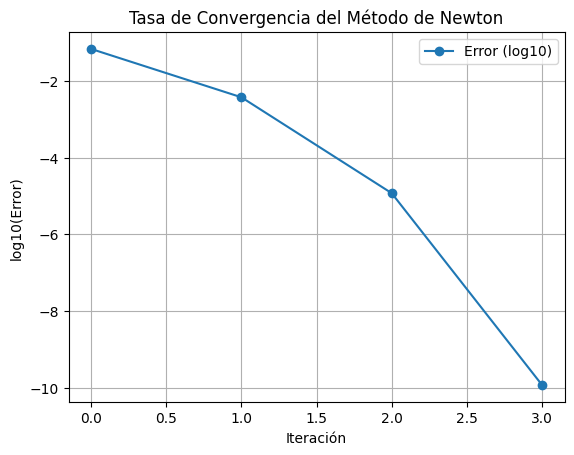

In [12]:
#2.7
import numpy as np
import matplotlib.pyplot as plt

# Método de Newton con registro de errores
def newton_method_with_errors(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    errors = []
    x_star = 0.6823278038280199
    for _ in range(max_iter):
        x_new = x - f(x) / df(x)
        error = abs(x_new - x_star)
        errors.append(error)
        if error < tol:
            break
        x = x_new
    return x, errors

x0 = 1.0
x_star, errors = newton_method_with_errors(f, df, x0)

# Gráfico del error vs. iteraciones
plt.plot(range(len(errors)), np.log10(errors), 'o-', label='Error (log10)')
plt.xlabel('Iteración')
plt.ylabel('log10(Error)')
plt.title('Tasa de Convergencia del Método de Newton')
plt.legend()
plt.grid()
plt.show()

# Ejercicio 3

In [15]:
import math

a, b, c = -0.5, 50, -200

discriminante = b**2 - 4*a*c
x1 = (-b + math.sqrt(discriminante)) / (2*a)
x2 = (-b - math.sqrt(discriminante)) / (2*a)

print(f"Raíces: x1 = {x1:.1f}, x2 = {x2:.1f}")

Raíces: x1 = 4.2, x2 = 95.8


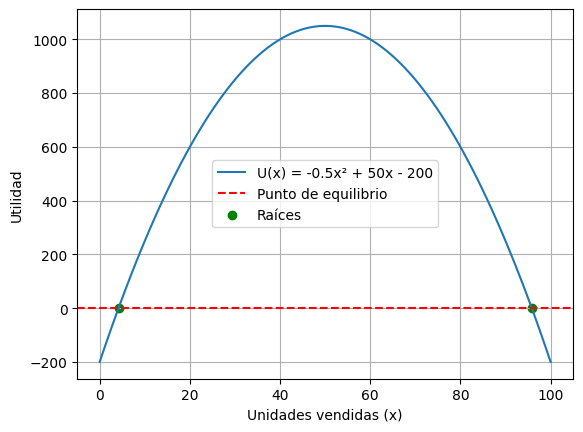

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 100, 100)
y = -0.5*x**2 + 50*x - 200

plt.plot(x, y, label="U(x) = -0.5x² + 50x - 200")
plt.axhline(0, color="red", linestyle="--", label="Punto de equilibrio")
plt.scatter([x1, x2], [0, 0], color="green", label="Raíces")
plt.xlabel("Unidades vendidas (x)")
plt.ylabel("Utilidad")
plt.legend()
plt.grid()
plt.show()